## Class

In [9]:
# Verinin incelenmesi için oluşturulan sınıf.
#Bu sınıf otomatik olarak veri hakkında ön bilgi verecek ve görselleştirilmesini sağlayacak

class DataInspect:
    
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import scipy.stats as stats
    
    
    def __init__(self,data):
        self.data = data
    
    
    #Veri için açıklayıcı özet çıkaracak fonksiyon
    def preInfo(self):
        #Verinin ilk 10 satırını gösterme
        print('\033[1m' + "First 10 row of the data\n" + '\033[0m')
        print(self.data.head(10))
        
        #Verinin veri tiplerini görüntüleme
        print('\033[1m' + "\n\nTypes of the columns\n" + '\033[0m')
        print(self.data.dtypes)
        
        #Verinin özet açıklaması ( mean , std. min , max vb.)
        print('\033[1m' + "\n\nDescription of the data\n" + '\033[0m')
        print (self.data.describe())
        
        #Verideki eksik değerlerin kolonlara göre sayısı
        print('\033[1m' + "\n\nNumber of null values\n" + '\033[0m')
        print(self.data.isnull().sum(axis = 0))
        
    # Verinin görselleştirilmesi için çağırılan fonksiyon    
    def preGraph(self):
        import warnings
        warnings.filterwarnings("ignore")
        
        print('\033[1m' + "\n\nData Visualiation\n" + '\033[0m')
      
        newplt=self.plt
        
        
        #Verideki veri tiplerine göre görselleştirme
        #Eğer kolon tipi sayısal değer ise kdeplot , object ise countplot çizdirilecek 
        for i in range(len(self.data.columns)):
               
            
            if (self.data.dtypes[i] != "object"):
                f,axes = newplt.subplots(1,1)
                sns.distplot(self.data.iloc[:,i],bins = 20)
                
            else:
                f,axes = newplt.subplots(1,1)
                sns.countplot(self.data.iloc[:,i],data=self.data)
        
        # Verinin boxplot gösterimi
        newplt.figure(figsize=(10,10))
        sns.boxplot(data=self.data)
        
        # Verinin Korelasyon Grafiği Gösterimi
        fig,ax = newplt.subplots(figsize=(5, 5))
        sns.heatmap(self.data.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
        newplt.show()
        
    # Kategorik olmkayan bağımsız değişkenlerin olasılık plotunun çıkarılması    
    def testStatsPlot(self):
        
        print('\033[1m' + "\n\nTest Statistics\n" + '\033[0m')
        
        newplt=self.plt
        
        print('\033[1m' + "\n\nProbability Plots of Data \n" + '\033[0m')
        nonObjColumns =[]
        for j in range (len(self.data.columns)):
            if (self.data.dtypes[j] != "object"):
                nonObjColumns.append(j)
                
        for i in range(0,len(nonObjColumns),2):
   
            figg=newplt.figure(figsize=(15,5))
            ax1=newplt.subplot(1,2,1)
            res=stats.probplot(self.data.iloc[:,nonObjColumns[i]].dropna(),dist = "norm", plot=plt)
            ax1.set_title("Probability Plot of '{0}' Column ".format(self.data.columns[nonObjColumns[i]]))
        
            if(i!=len(nonObjColumns)-1):
            
                ax2=newplt.subplot(1,2,2)
                res2=stats.probplot(self.data.iloc[:,nonObjColumns[i+1]].dropna(),dist = "norm", plot=plt)
                ax2.set_title("Probability Plot of '{0}' Column ".format(self.data.columns[nonObjColumns[i+1]]))
                plt.show()
     
    # Bağımsız değişkenlerin normal dağılıma sahip olup olmadığını girilen alpha değeri ile kontrol ediyor 
        
    def testStatsNormTest(self,alpha,response):
        data=self.data.copy()
        data=data.drop(columns=[response])
        
        np=self.np
        stats=self.stats
        pd=self.pd
        
        alphaValue=alpha
        comparisionWithAlfa=[]
        statValueArray=[]
        pValueArray=[]
        objCol,objName,nonObjCol,nonObjName=self.typeFinder(response)

        for i in range(0,len(nonObjCol)):
            stat , p = stats.shapiro(data.iloc[:,nonObjCol[i]].dropna())
            statValueArray.append(round(stat,4))
            pValueArray.append(round(p,9))
            if (p<alphaValue):
                comparisionWithAlfa.append('Yes')
            else:
                comparisionWithAlfa.append('No')
                
        statValueArray=np.array([statValueArray])
        pValueArray=np.array([pValueArray])
        comparisionWithAlfa=np.array([comparisionWithAlfa])
        
        pStatsDf=pd.DataFrame(np.concatenate((pValueArray,statValueArray,comparisionWithAlfa), axis=0))
        pStatsDf.columns =nonObjName
        pStatsDf.index=["P Value","Statistics","p<a ?"]
        return (pStatsDf)
 

                                                 
    def typeFinder(self,response):
        data=self.data.copy()
        data=data.drop(columns=[response])
        objColumns=[]
        objColumnNames=[]
        nonObjColumns=[]
        nonObjColumnNames=[]
        
        for j in range (len(data.columns)):
                    if (data.dtypes[j] == "object"):
                        objColumns.append(j)
                        objColumnNames.append(data.columns[j])
                        
                    else:
                        nonObjColumns.append(j)
                        nonObjColumnNames.append(data.columns[j])
                        
        return objColumns,objColumnNames,nonObjColumns,nonObjColumnNames
                                        
    
    def test(self):
        objCol,objName,nonObjcol,nonobjName=self.typeFinder()
        print(objCol)
        print(objName)
        print(nonObjcol)
        print(nonobjName)

In [155]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import pylab
import statsmodels.api as sm
import seaborn as sns
from scipy.stats import shapiro
from sklearn.linear_model import LinearRegression
from sklearn import model_selection

# PCA ANALİZİ

In [20]:
import pandas as pd
orjData = pd.read_excel("HW_Data_PCA.xlsx")

In [87]:
df = orjData.copy()
df.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-49.6,-54,-152,-353,1.0,0.498547,0.701906,15.135802,35.625252,36.997753
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-55.6,-60,-158,-359,1.0,0.537088,0.690833,15.143348,35.643013,37.016198
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-58.4,-60,-160,-362,1.0,0.615169,0.693040,15.146870,35.651301,-37.024805
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-61.8,-65,-166,-367,1.0,0.661517,0.673418,15.153283,0.000000,-37.040483
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-79.8,-86,-186,-388,1.0,0.747204,0.700522,-15.179065,-35.727079,-37.103503


In [88]:
df.drop(["50_target","90_target"],axis=1,inplace=True) #Dropping other targets

In [89]:
df.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_412,ind_414,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,0.002371,2.0,-49.6,-54,-152,-353,1.0,0.498547,0.701906,15.135802
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,0.003074,0.8,-55.6,-60,-158,-359,1.0,0.537088,0.690833,15.143348
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,0.003561,2.7,-58.4,-60,-160,-362,1.0,0.615169,0.693040,15.146870
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,0.004366,0.9,-61.8,-65,-166,-367,1.0,0.661517,0.673418,15.153283
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,0.004198,0.1,-79.8,-86,-186,-388,1.0,0.747204,0.700522,-15.179065


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6167 entries, 0 to 6166
Columns: 134 entries, ind_5 to 20_target
dtypes: float64(86), int64(45), object(3)
memory usage: 6.3+ MB


In [91]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ind_5,6167.0,-0.803146,23.624403,-131.000000,-14.000000,0.000000,13.000000,76.000000
ind_6,6167.0,-0.803470,23.624144,-131.000000,-14.000000,0.000000,13.000000,76.000000
ind_8,6167.0,48.388890,36.388526,0.000000,14.285714,50.000000,85.714286,100.000000
ind_9,6167.0,48.289282,36.478009,0.000000,14.285714,50.000000,85.714286,100.000000
ind_10,6167.0,0.099609,60.414625,-100.000000,-50.000000,0.000000,57.142857,100.000000
...,...,...,...,...,...,...,...,...
ind_418,6167.0,-28.166694,23.271524,-188.000000,-39.000000,-22.000000,-11.000000,0.000000
ind_424,6167.0,0.490297,0.425376,0.000000,0.000000,0.473684,1.000000,1.000000
ind_426,6167.0,0.498188,0.228547,0.000000,0.323783,0.495192,0.675730,1.000000
ind_428,6167.0,0.490174,0.150483,0.083530,0.379894,0.487078,0.601508,0.868534


In [92]:
classData= DataInspect(df)

In [93]:
objColumns,objColumnNames,nonObjColumns,nonObjColumnNames=classData.typeFinder("20_target")
print(objColumns)
print(objColumnNames)

[60, 128, 129]
['ind_109', 'ind_420', 'ind_422']


In [94]:
# Soru işaretli veriler olduğu için ind_422 ve ind_420 kolonları drop edilecektir
df.drop(["ind_422","ind_420"],axis=1,inplace=True)

In [95]:
#Verimizde bir kategorik bağımsız değişken var. Bu değişkenin aldığı değerler ise GREEN ve RED , bu değerler için dummy variable oluşturacağız
df["ind_109"].unique()

array(['GREEN', 'RED'], dtype=object)

In [96]:
# Sadece bir kategorik değişken olduğu için ve 2 değere sahip oldukları için map fonksiyonu ile kendim dummy değişken yaratacağım
# 0 değeri Green için , 1 değeri RED için
df["ind_109"]=df.ind_109.map({"GREEN":0,"RED":1})

In [97]:
df.ind_109

0       0
1       0
2       0
3       0
4       0
       ..
6162    1
6163    1
6164    0
6165    0
6166    0
Name: ind_109, Length: 6167, dtype: int64

In [98]:
#Verimiz PCA için Hazır ama öncesinde herhangi bir dimensional reduction yapmadan linear regression sonuçlarımıza bakalım.

In [99]:
df.head(1)

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_407,ind_410,ind_412,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428,20_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.8,17.62,11.73,...,-23,-27,0.002371,2.0,-49.6,-54,1.0,0.498547,0.701906,15.135802


In [102]:
y=df["20_target"]
X=df.iloc[:,:-1]

In [110]:
# R-Square değerimiz 0.073 ve toplamda 131 adet feature modele katılmış durumda.
X=sm.add_constant(X)
lm= sm.OLS(y,X)
model = lm.fit()
model.summary()

C:\Users\User\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              20_target   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     3.616
Date:                Wed, 05 Aug 2020   Prob (F-statistic):           2.76e-38
Time:                        20:45:20   Log-Likelihood:                -25149.
No. Observations:                6167   AIC:                         5.056e+04
Df Residuals:                    6035   BIC:                         5.145e+04
Df Model:                         131                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.9621     16.336      1.344      0.179     -10.061      53.986
ind_5          0.1131      0.339      0.333      0.739      -0.552       0.778
ind_6          0.2135      0.274      0.779      0.436      -0.324       0.751
ind_8      -6.771e+07   5.35e+07     -1.266      0.206   -1.73e+08    3.72e+07
ind_9       6.771e+07   5.35e+07      1.266      0.206   -3.72e+07    1.73e+08
ind_10      6.771e+07   5.35e+07      1.266      0.206   -3.72e+07    1.73e+08
ind_12        -0.0192      0.818     -0.023      0.981      -1.622       1.584
ind_13        -0.0116      0.010     -1.144      0.253      -0.032       0.008
ind_14         0.0716      0.068      1.058      0.290      -0.061       0.204
ind_15        -0.1293      0.098     -1.313      0.189      -0.322       0.064
ind_16        -0.0111      0.147     -0.076      0.940      -0.299       0.277
ind_17         0.3087      0.155      1.993      0.046       0.005       0.612
ind_18         0.3439      0.112      3.070      0.002       0.124       0.563
ind_19         0.0665      0.525      0.127      0.899      -0.962       1.095
ind_20        -0.3886      0.421     -0.923      0.356      -1.214       0.437
ind_21         0.4362      0.500      0.872      0.383      -0.544       1.417
ind_22         0.1875      0.130      1.443      0.149      -0.067       0.442
ind_23         0.1062      0.131      0.809      0.418      -0.151       0.364
ind_25      1.782e+05   4.01e+05      0.444      0.657   -6.08e+05    9.65e+05
ind_26      1.783e+05   4.01e+05      0.444      0.657   -6.08e+05    9.65e+05
ind_27     -3.566e+05   8.02e+05     -0.444      0.657   -1.93e+06    1.22e+06
ind_28        -0.0082      0.005     -1.783      0.075      -0.017       0.001
ind_29        -0.0032      0.007     -0.441      0.659      -0.017       0.011
ind_30        -0.0204      0.008     -2.483      0.013      -0.037      -0.004
ind_31         0.0121      0.011      1.073      0.283      -0.010       0.034
ind_32        -0.0137      0.011     -1.294      0.196      -0.034       0.007
ind_33         0.0049      0.010      0.491      0.623      -0.015       0.024
ind_34         0.0265      0.011      2.369      0.018       0.005       0.048
ind_35        -0.0303      0.009     -3.313      0.001      -0.048      -0.012
ind_36        -0.0057      0.007     -0.830      0.407      -0.019       0.008
ind_37         0.0325      0.007      4.711      0.000       0.019       0.046
ind_39         0.0033      0.033      0.101      0.919      -0.061       0.068
ind_40        -1.1144      0.503     -2.216      0.027      -2.100      -0.129
ind_41        -0.0231      0.030     -0.777      0.437      -0.081       0.035
ind_42         0.0407      0.150      0.272      0.785      -0.252       0.334
ind_43         0.0936      0.099      0.948      0.343      -0.100       0.287
in

### PCA YAPILMASI

In [164]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error, r2_score
pca = PCA()

In [113]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=0)

In [117]:
training = df.copy()

In [167]:
X_reduced_train = pca.fit_transform(scale(X_train))

In [229]:
# 20 adet PCA ile bağımsız değişkenlerin varyansının %85ini açıklayabiliyoruz %85ini açıklayabiliyoruz.
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)[0:20]

array([37.47, 49.76, 55.6 , 60.11, 63.27, 66.33, 68.99, 71.02, 72.73,
       74.34, 75.84, 77.19, 78.52, 79.77, 80.98, 82.11, 83.11, 84.03,
       84.88, 85.71])

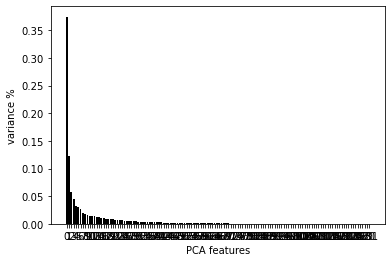

In [141]:
import matplotlib.pyplot as plt
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features);

In [168]:
#132 PCA komponenti ile linear regresyon sonucu
lm = LinearRegression()
pca.n_components_

132

In [175]:
regression = lm.fit(X_reduced_train,y_train)

In [162]:
y_pred = regression.predict(X_reduced_train)

In [169]:
# Tüm PCA komponentleri ile regresyon yaptığımızda R2 sonucunda önemli bir farklılık olmadı.
# Komponent sayısını azaltıp , modeli hafifletip tekrar deneyeceğim
r2_score(y_train, y_pred)

0.08075453714571268

In [233]:
# Komponent sayısına göre R2 ve RMSE hesaplayıp grafiğe dökme
rscore =[]
RMSE = []
for i in range (1,133):
    pca = PCA(n_components = i)
    X_reduced_train = pca.fit_transform(scale(X_train))
    lm = LinearRegression()
    regression = lm.fit(X_reduced_train,y_train)
    y_pred = regression.predict(X_reduced_train)
    rscore.append(r2_score(y_train, y_pred))
    RMSE.append(np.sqrt(mean_squared_error(y_train,y_pred)))
        

Text(0.5, 0, 'Komponent Sayısı')

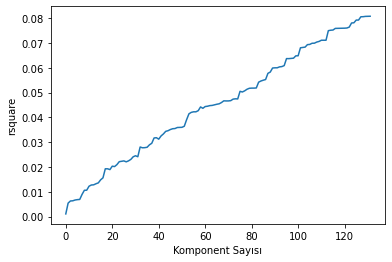

In [235]:
# En yüksek r2 skoru 132 PCA kullanılınca çıkıyor
plt.plot(rscore)
plt.ylabel('rsquare')
plt.xlabel("Komponent Sayısı")

Text(0.5, 0, 'Komponent Sayısı')

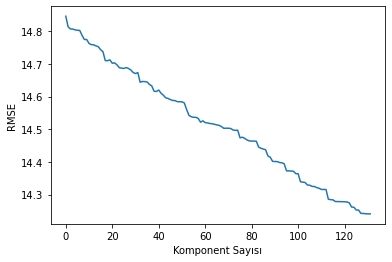

In [236]:
plt.plot(RMSE)
plt.ylabel('RMSE')
plt.xlabel("Komponent Sayısı")

In [192]:
pca = PCA(n_components = 90)
X_reduced_train = pca.fit_transform(scale(X_train))
lm = LinearRegression()
regression = lm.fit(X_reduced_train,y_train)
y_pred = regression.predict(X_reduced_train)
r2_score(y_train, y_pred)

0.05992040528326659

### Tuning

In [203]:
pca2 = PCA()
X_reduced_test = pca2.fit_transform(scale(X_test))
y_pred = regression.predict(X_reduced_test)
np.sqrt(mean_squared_error(y_test, y_pred))

15.121021565984233

In [204]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train[:,0:10], y_train)
y_pred = pcr_model.predict(X_reduced_test[:,0:10])
print(np.sqrt(mean_squared_error(y_test, y_pred)))

14.779011783811352


In [206]:
cv_10 = model_selection.KFold(n_splits = 10,
                             shuffle = True,
                             random_state = 1)

In [207]:
lm = LinearRegression()

In [208]:
RMSE = []

In [209]:
for i in np.arange(1, X_reduced_train.shape[1] + 1):
    
    score = np.sqrt(-1*model_selection.cross_val_score(lm, 
                                                       X_reduced_train[:,:i], 
                                                       y_train.ravel(), 
                                                       cv=cv_10, 
                                                       scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

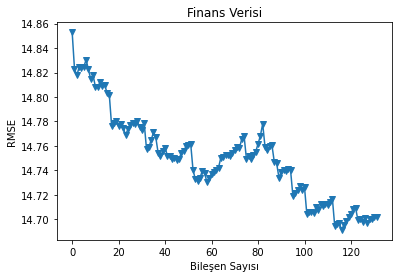

In [217]:
plt.plot(RMSE, '-v')
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Finans Verisi');

In [221]:
#RMSE'si en düşük çıkan komponent sayısı
for i in range (len(RMSE)):
    if RMSE[i] == min(RMSE):
        print (i)


116


#### Optimum Komponent Sayısına Göre Model Kurulumu

In [225]:
lm = LinearRegression()

In [226]:
pcr_model = lm.fit(X_reduced_train[:,0:117], y_train)
y_pred = pcr_model.predict(X_reduced_train[:,0:117])
print(np.sqrt(mean_squared_error(y_train, y_pred)))

14.279015531642612


In [227]:
# Optimum komponent sayısına göre kurulan modelin R2 skoru
#116 Adet PCA komponenti ile kurulan modelin ise r2 değeri 0.076 olarak bulunmakta. Komponent sayısı 131 den 116ya düşmekte. 

r2_score(y_train, y_pred)

0.07585314555268796

# LOJİSTİK REGRESYON

In [260]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from warnings import filterwarnings
filterwarnings('ignore')

In [350]:
data = pd.read_csv("hmelq.csv")
df=data.copy()

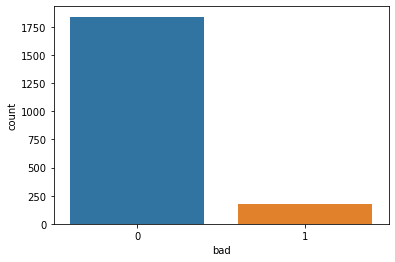

In [471]:
sns.countplot("bad",data=df)

In [294]:
df.head()
#0 Good Risk , 1 : Bad Risk

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [351]:
#Verideki nulların atılması
df.dropna(inplace=True)
df.index=range(0,len(df)) 
df.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,18200,94727.0,136877.0,DebtCon,Mgr,15.0,0.0,0.0,168.96,2.0,26.0,36.056
1,0,21700,79240.0,96784.0,DebtCon,Mgr,5.0,0.0,0.0,64.51,6.0,24.0,38.079
2,0,34100,241931.0,36486.0,DebtCon,Mgr,1.0,0.0,2.0,196.01,3.0,50.0,42.459
3,0,8400,62989.0,76718.0,HomeImp,Mgr,3.0,0.0,2.0,131.47,0.0,22.0,29.200
4,0,17400,25859.0,43684.0,DebtCon,Mgr,16.0,1.0,0.0,95.36,1.0,17.0,27.108


In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2018 entries, 0 to 2017
Data columns (total 13 columns):
bad        2018 non-null int64
loan       2018 non-null int64
mortdue    2018 non-null float64
value      2018 non-null float64
reason     2018 non-null object
job        2018 non-null object
yoj        2018 non-null float64
derog      2018 non-null float64
delinq     2018 non-null float64
clage      2018 non-null float64
ninq       2018 non-null float64
clno       2018 non-null float64
debtinc    2018 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 205.1+ KB


In [242]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bad,3576.0,0.199385,0.399594,0.00,0.00,0.000,0.00,1.000
loan,3576.0,18529.697987,11262.834060,1100.00,11000.00,16200.000,23100.00,89900.000
mortdue,3262.0,74013.907992,44016.833772,2619.00,46700.25,65858.000,91717.00,399550.000
value,3512.0,101076.922759,54865.275351,8800.00,65753.00,89183.000,118928.25,850000.000
yoj,3264.0,8.832644,7.568046,0.00,3.00,7.000,13.00,41.000
derog,3149.0,0.261670,0.865178,0.00,0.00,0.000,0.00,10.000
delinq,3225.0,0.432558,1.099230,0.00,0.00,0.000,0.00,15.000
clage,3397.0,179.832529,87.066198,0.49,115.60,173.640,230.71,1168.230
ninq,3273.0,1.186373,1.728723,0.00,0.00,1.000,2.00,17.000
clno,3443.0,21.507116,10.167490,0.00,15.00,20.000,26.00,71.000


In [298]:
df.head(1)

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,18200,94727.0,136877.0,DebtCon,Mgr,15.0,0.0,0.0,168.96,2.0,26.0,36.056


### Başlamadan önce kategorik değişkenlerin dummy'e çevrilmesi

In [443]:
# X ler ve y nin tanımlanması
y = df["bad"]
X= df.drop(["bad"],axis=1)
X.head(10)

,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,18200,94727.0,136877.0,DebtCon,Mgr,15.0,0.0,0.0,168.96,2.0,26.0,36.056
1,21700,79240.0,96784.0,DebtCon,Mgr,5.0,0.0,0.0,64.51,6.0,24.0,38.079
2,34100,241931.0,36486.0,DebtCon,Mgr,1.0,0.0,2.0,196.01,3.0,50.0,42.459
3,8400,62989.0,76718.0,HomeImp,Mgr,3.0,0.0,2.0,131.47,0.0,22.0,29.200
4,17400,25859.0,43684.0,DebtCon,Mgr,16.0,1.0,0.0,95.36,1.0,17.0,27.108
5,23900,140328.0,183533.0,HomeImp,Mgr,8.0,0.0,0.0,322.79,0.0,17.0,45.413
6,19700,70709.0,97394.0,DebtCon,Mgr,0.0,0.0,0.0,94.86,0.0,17.0,25.557
7,17300,79412.0,114906.0,DebtCon,Mgr,17.0,0.0,0.0,247.36,4.0,30.0,36.536
8,11700,78157.0,103016.0,DebtCon,Mgr,1.0,0.0,0.0,69.81,2.0,24.0,38.448
9,25300,51261.0,87025.0,DebtCon,Mgr,4.0,0.0,0.0,249.84,2.0,25.0,31.659


In [444]:
#Kategorik değişkenlerin encode edilmesi
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3,4])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [445]:
newdf = pd.DataFrame(X)
newdf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,18200.0,94727.0,136877.0,15.0,0.0,0.0,168.96,2.0,26.0,36.056
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,21700.0,79240.0,96784.0,5.0,0.0,0.0,64.51,6.0,24.0,38.079
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,34100.0,241931.0,36486.0,1.0,0.0,2.0,196.01,3.0,50.0,42.459
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,8400.0,62989.0,76718.0,3.0,0.0,2.0,131.47,0.0,22.0,29.200
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,17400.0,25859.0,43684.0,16.0,1.0,0.0,95.36,1.0,17.0,27.108


### Lojistik Regresyon Tahmini

In [707]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [708]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [709]:

# Confusion matrix 
from sklearn.metrics import confusion_matrix
y_pred_train = classifier.predict(X_train)
cm1 = confusion_matrix(y_train, y_pred_train)

y_pred_test = classifier.predict(X_test)
cm2=confusion_matrix(y_test, y_pred_test)

In [710]:
# Train setinin tahmin confusion Matrix'i
cm1

array([[1374,    4],
       [ 132,    3]], dtype=int64)

In [711]:
# Test setinin tahmin confusion Matrix'i
cm2

array([[458,   4],
       [ 40,   3]], dtype=int64)

In [712]:
print ("Train Seti Accuracy Skoru: {}  ".format(accuracy_score(y_train,y_pred_train)) )
print ("Test Seti Accuracy Skoru: {}  ".format(accuracy_score(y_test,y_pred_test)) )

Train Seti Accuracy Skoru: 0.9101123595505618  
Test Seti Accuracy Skoru: 0.9128712871287129  


In [713]:
#Train Seti Raporu
# Raporu incelediğimizde Bad risk skorlarının tahmin gücü çok az gözüküyor.
print ( classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1378
           1       0.43      0.02      0.04       135

    accuracy                           0.91      1513
   macro avg       0.67      0.51      0.50      1513
weighted avg       0.87      0.91      0.87      1513



In [714]:
#Test Seti Raporu
# Raporu incelediğimizde Bad risk skorlarının tahmin gücü çok az gözüküyor.
print ( classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       462
           1       0.43      0.07      0.12        43

    accuracy                           0.91       505
   macro avg       0.67      0.53      0.54       505
weighted avg       0.88      0.91      0.88       505



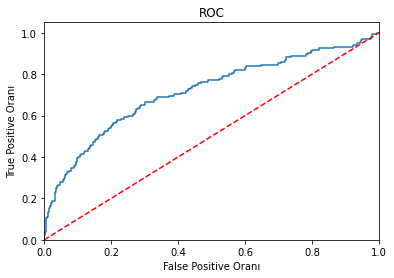

In [715]:
logit_roc_auc = roc_auc_score(y_train,y_pred_train)
fpr, tpr,tresholds = roc_curve(y_train,classifier.predict_proba(X_train)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

### Tuning

In [716]:
y_pred_train_probs=classifier.predict_proba(X_train)
y_pred_train_probs

array([[0.98070139, 0.01929861],
       [0.9865487 , 0.0134513 ],
       [0.86158806, 0.13841194],
       ...,
       [0.70019536, 0.29980464],
       [0.9635773 , 0.0364227 ],
       [0.97475993, 0.02524007]])

In [717]:
# Tresholdu %80 olarak ayarlıyorum
newTrainPred=[]
for i in range (len(y_pred_train_probs)):
    if y_pred_train_probs[i,0] >0.80:
        newTrainPred.append(0)
    else:
        newTrainPred.append(1)
          

In [718]:
cm3=confusion_matrix(y_train, newTrainPred)
cm3  

array([[1213,  165],
       [  78,   57]], dtype=int64)

In [719]:
overalSkor=round((cm3[0,0]+cm3[1,1]) /cm3.sum(),3)
goodRiskRecall=round((cm3[0,0]) /((cm3[0,0]+cm3[0,1])),3)
goodRiskPrecision=round((cm3[0,0]) /((cm3[0,0]+cm3[1,0])),3)
badRiskRecall=round((cm3[1,1]) /((cm3[1,0]+cm3[1,1])),3)
badRiskPrecision=round((cm3[1,1]) /((cm3[0,1]+cm3[1,1])),3)


In [720]:
# Tresholdu %80 olark ayarlayınca 
print ("Overal Skor : {} \n".format(overalSkor))
print ("Good Risk Recall : {} ".format(goodRiskRecall))
print ("Good Risk Precision : {}\n ".format(goodRiskPrecision))
print ("Bad Risk Recall : {} ".format(badRiskRecall))
print ("Bad Risk Precision : {} ".format(badRiskPrecision))

Overal Skor : 0.839 

Good Risk Recall : 0.88 
Good Risk Precision : 0.94
 
Bad Risk Recall : 0.422 
Bad Risk Precision : 0.257 


In [721]:
print ( classification_report(y_train,newTrainPred))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91      1378
           1       0.26      0.42      0.32       135

    accuracy                           0.84      1513
   macro avg       0.60      0.65      0.61      1513
weighted avg       0.88      0.84      0.86      1513



In [722]:
#Mevcut durum ve Tuning edilmiş model raporlarına baktığımızda , 
#mevcut durumda overall score 0.91 den 0.84 e gerilemiş durumda ancak 
#Bad Risk f1-score  ve recall değerlerinde büyük bir gelişme görülmekte.
#Bu durum ise modelimizin Bad Risk değerlerini mevcut duruma göre daha iyi tahmin etmesini sağlamakta.


#### Test Setinin Tuning'i

In [727]:
y_pred_test_probs=classifier.predict_proba(X_test)
y_pred_test_probs

array([[9.74211037e-01, 2.57889630e-02],
       [7.24203177e-01, 2.75796823e-01],
       [9.16293649e-01, 8.37063506e-02],
       ...,
       [9.99789982e-01, 2.10017536e-04],
       [9.83219095e-01, 1.67809052e-02],
       [9.77928995e-01, 2.20710049e-02]])

In [732]:
# Tresholdu %80 olarak ayarlıyorum
newTestPred=[]
for i in range (len(y_pred_test_probs)):
    if y_pred_test_probs[i,0] >0.80:
        newTestPred.append(0)
    else:
        newTestPred.append(1)
          

In [735]:
print ( classification_report(y_test,newTestPred))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90       462
           1       0.22      0.42      0.29        43

    accuracy                           0.82       505
   macro avg       0.58      0.64      0.59       505
weighted avg       0.88      0.82      0.85       505

